Project 3 Modeling

# Importing functions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import numpy as np
import datetime
import seaborn as sns

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, label_binarize, LabelEncoder
from visualize import generate_moons_df, preprocess, plot_boundaries

from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, plot_roc_curve, \
classification_report, mean_squared_error, r2_score, auc, \
accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve,f1_score, fbeta_score, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelBinarizer

from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost as xgb

from Project_3_functions import data_prep_binarized_with_names, data_prep_NOT_binarized_with_names, get_classification_reports, get_scores, get_ROC_curve, get_confusion_matrix, process_and_get_scores_CV

# Importing data

In [73]:
df = pd.read_pickle('superhero_data_for_model_10-20-20_PICKLE')

features = ['ID', 'EYE', 'HAIR', 'SEX', 'GSM', 'ALIVE', 'APPEARANCES']
target = ['ALIGN']

features_with_name = ['name','ID', 'EYE', 'HAIR', 'SEX', 'GSM', 'ALIVE', 'APPEARANCES']


# Processing data

In [74]:
# not binarized
X_train_preprocessed, X_test_preprocessed, y_train, y_test, train_names, test_names = data_prep_NOT_binarized_with_names(df, features_with_name, target)

# binarized
X_train_preprocessed, X_test_preprocessed, y_train_b, y_test_b, train_names, test_names = data_prep_binarized_with_names(df, features_with_name, target)

X_train_preprocessed, X_test_preprocessed, y_train, y_test, train_names, test_names variables created
X_train_preprocessed, X_test_preprocessed, y_train_b, y_test_b, train_names, test_names variables created


# Setting up models

In [75]:
lr = LogisticRegression(penalty='none')
knn = KNeighborsClassifier(n_neighbors=18)
gauss = GaussianNB()
svm = SVC(probability =True)
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()
xgb = XGBClassifier()


models = [lr, knn, gauss, svm, dec_tree, rand_forest, xgb]
model_names = ['Linear Regression', 'knn', 'gauss', 'SVM', 'dec_tree', 'rand_forest', 'xgb']

# excluding some models
# models = [knn, dec_tree, rand_forest, xgb]
# model_names = ['knn', 'dec_tree', 'rand_forest', 'xgb']

# Class reports

In [76]:
# use with binarized data
get_classification_reports(models, model_names, X_train_preprocessed, X_test_preprocessed, y_train_b, y_test_b)

Linear Regression




/Users/noah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      0.44      0.51      2398
           1       0.61      0.17      0.27      1910
           2       0.38      0.01      0.01      1510

   micro avg       0.60      0.24      0.34      5818
   macro avg       0.53      0.21      0.26      5818
weighted avg       0.54      0.24      0.30      5818
 samples avg       0.24      0.24      0.24      5818

------------------------------------------------------------


knn




/Users/noah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/noah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.58      0.48      0.53      2398
           1       0.60      0.24      0.34      1910
           2       0.41      0.06      0.11      1510

   micro avg       0.57      0.29      0.39      5818
   macro avg       0.53      0.26      0.32      5818
weighted avg       0.54      0.29      0.36      5818
 samples avg       0.29      0.29      0.29      5818

------------------------------------------------------------


gauss


              precision    recall  f1-score   support

           0       0.42      0.98      0.59      2398
           1       0.34      0.99      0.50      1910
           2       0.36      0.17      0.23      1510

   micro avg       0.38      0.77      0.51      5818
   macro avg       0.37      0.71      0.44      5818
weighted avg       0.38      0.77      0.47      5818
 samples avg       0.38      0.77      0.51      5818

-----------------------------------------------------------

/Users/noah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.61      0.38      0.47      2398
           1       0.62      0.16      0.26      1910
           2       0.30      0.00      0.00      1510

   micro avg       0.61      0.21      0.31      5818
   macro avg       0.51      0.18      0.24      5818
weighted avg       0.53      0.21      0.28      5818
 samples avg       0.21      0.21      0.21      5818

------------------------------------------------------------


dec_tree




/Users/noah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.56      0.53      0.55      2398
           1       0.50      0.31      0.38      1910
           2       0.33      0.17      0.22      1510

   micro avg       0.50      0.37      0.42      5818
   macro avg       0.46      0.34      0.38      5818
weighted avg       0.48      0.37      0.41      5818
 samples avg       0.35      0.37      0.35      5818

------------------------------------------------------------


rand_forest




/Users/noah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.55      0.57      0.56      2398
           1       0.52      0.33      0.40      1910
           2       0.33      0.17      0.23      1510

   micro avg       0.50      0.39      0.44      5818
   macro avg       0.47      0.36      0.40      5818
weighted avg       0.48      0.39      0.42      5818
 samples avg       0.38      0.39      0.38      5818

------------------------------------------------------------


xgb


              precision    recall  f1-score   support

           0       0.61      0.50      0.55      2398
           1       0.59      0.30      0.40      1910
           2       0.40      0.06      0.11      1510

   micro avg       0.58      0.32      0.41      5818
   macro avg       0.53      0.29      0.35      5818
weighted avg       0.55      0.32      0.38      5818
 samples avg       0.32      0.32      0.32      5818

------------------------------------------------------------


/Users/noah/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Accuracy, precision, recall, f1 - no cross validation

In [10]:
get_scores(models, model_names, X_train_preprocessed, X_test_preprocessed, y_train_b, y_test_b)

Linear Regression


Accuracy:  0.238 +- 0.000000
Precision:  0.538 +- 0.000000
Recall:  0.238 +- 0.000000
f1-score:  0.301 +- 0.000000
------------------------------------------------------------


knn


Accuracy:  0.283 +- 0.000000
Precision:  0.541 +- 0.000000
Recall:  0.283 +- 0.000000
f1-score:  0.356 +- 0.000000
------------------------------------------------------------


gauss


Accuracy:  0.013 +- 0.000000
Precision:  0.358 +- 0.000000
Recall:  0.961 +- 0.000000
f1-score:  0.518 +- 0.000000
------------------------------------------------------------


SVM


Accuracy:  0.223 +- 0.000000
Precision:  0.541 +- 0.000000
Recall:  0.223 +- 0.000000
f1-score:  0.289 +- 0.000000
------------------------------------------------------------


dec_tree


Accuracy:  0.333 +- 0.000000
Precision:  0.483 +- 0.000000
Recall:  0.374 +- 0.000000
f1-score:  0.414 +- 0.000000
------------------------------------------------------------


rand_forest


Accuracy:  0.385 +- 0.000000
Precision:  0.49

# Data processing and accuracy, precision, recall, f1 with cross validation

In [77]:
lr = LogisticRegression(penalty='none')
knn = KNeighborsClassifier(n_neighbors=18)
gauss = GaussianNB()
svm = SVC(probability =True)
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()
xgb = XGBClassifier()


# models = [lr, knn, gauss, svm, dec_tree, rand_forest, xgb]
# model_names = ['Logistic Regression', 'knn', 'gauss', 'SVM', 'dec_tree', 'rand_forest', 'xgb']

# excluding some models
models = [knn, dec_tree, rand_forest, xgb]
model_names = ['knn', 'dec_tree', 'rand_forest', 'xgb']

In [10]:
process_and_get_scores_CV(models, model_names, X,y)



------------------------------------
	Beginning of fold: 1
------------------------------------


model: knn


/Users/noah/Github_repos/Project_3/Project_3_functions.py:334: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train_preprocessed, y_train)


model: dec_tree
model: rand_forest


/Users/noah/Github_repos/Project_3/Project_3_functions.py:334: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_preprocessed, y_train)


model: xgb


/Users/noah/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)




------------------------------------
	Beginning of fold: 2
------------------------------------


model: knn


/Users/noah/Github_repos/Project_3/Project_3_functions.py:334: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train_preprocessed, y_train)


model: dec_tree
model: rand_forest


/Users/noah/Github_repos/Project_3/Project_3_functions.py:334: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_preprocessed, y_train)


model: xgb


/Users/noah/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)




------------------------------------
	Beginning of fold: 3
------------------------------------


model: knn


/Users/noah/Github_repos/Project_3/Project_3_functions.py:334: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train_preprocessed, y_train)


model: dec_tree
model: rand_forest


/Users/noah/Github_repos/Project_3/Project_3_functions.py:334: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_preprocessed, y_train)


model: xgb


/Users/noah/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)




------------------------------------
	Beginning of fold: 4
------------------------------------


model: knn


/Users/noah/Github_repos/Project_3/Project_3_functions.py:334: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train_preprocessed, y_train)


model: dec_tree
model: rand_forest


/Users/noah/Github_repos/Project_3/Project_3_functions.py:334: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_preprocessed, y_train)


model: xgb


/Users/noah/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)




------------------------------------
	Beginning of fold: 5
------------------------------------


model: knn


/Users/noah/Github_repos/Project_3/Project_3_functions.py:334: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train_preprocessed, y_train)


model: dec_tree
model: rand_forest


/Users/noah/Github_repos/Project_3/Project_3_functions.py:334: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_preprocessed, y_train)


model: xgb


/Users/noah/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)




knn
accuracy across folds: 0.489 +- 0.003
precision across folds: 0.474 +- 0.005
recall across folds: 0.489 +- 0.003
f1 across folds: 0.468 +- 0.005


dec_tree
accuracy across folds: 0.469 +- 0.008
precision across folds: 0.453 +- 0.008
recall across folds: 0.469 +- 0.008
f1 across folds: 0.453 +- 0.009


rand_forest
accuracy across folds: 0.479 +- 0.004
precision across folds: 0.467 +- 0.004
recall across folds: 0.479 +- 0.004
f1 across folds: 0.468 +- 0.005


xgb
accuracy across folds: 0.518 +- 0.007
precision across folds: 0.503 +- 0.008
recall across folds: 0.518 +- 0.007
f1 across folds: 0.496 +- 0.008




# Confusion matrices

In [71]:
lr = LogisticRegression(penalty='none')
knn = KNeighborsClassifier(n_neighbors=18)
gauss = GaussianNB()
svm = SVC(probability =True)
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()
xgb = XGBClassifier()


# models = [lr, knn, gauss, svm, dec_tree, rand_forest, xgb]
# model_names = ['Linear Regression', 'knn', 'gauss', 'SVM', 'dec_tree', 'rand_forest', 'xgb']

# excluding some models
models = [knn, dec_tree, rand_forest, xgb]
model_names = ['knn', 'dec_tree', 'rand_forest', 'xgb']

/Users/noah/Github_repos/Project_3/Project_3_functions.py:378: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train, y_train)
/Users/noah/Github_repos/Project_3/Project_3_functions.py:378: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/Users/noah/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


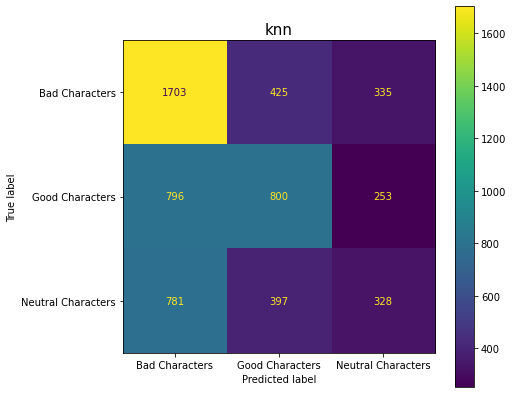

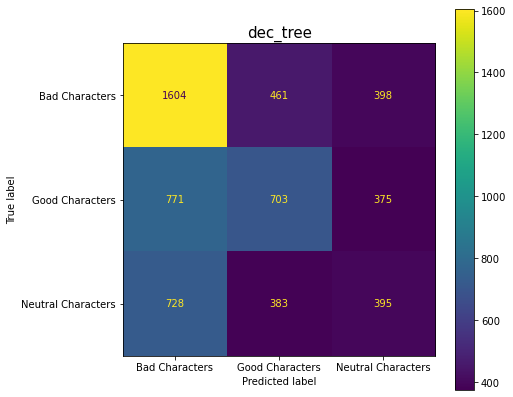

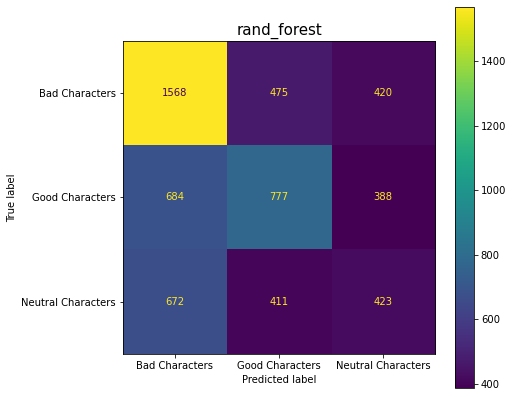

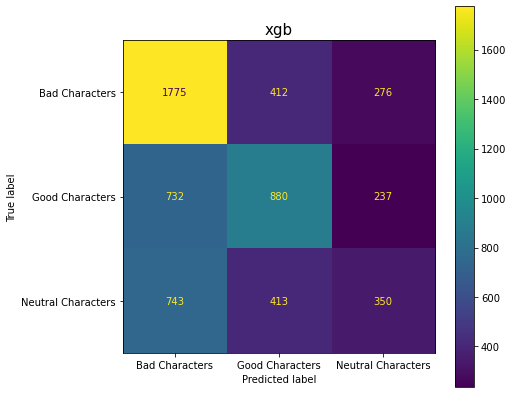

In [70]:
# non-binarized data
get_confusion_matrix(models, model_names, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

# ROC curves

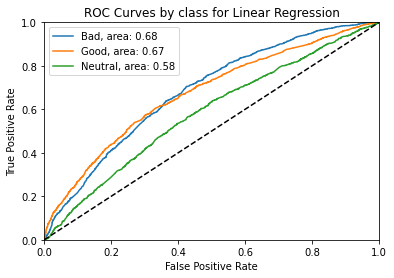

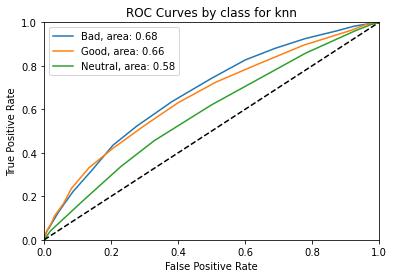

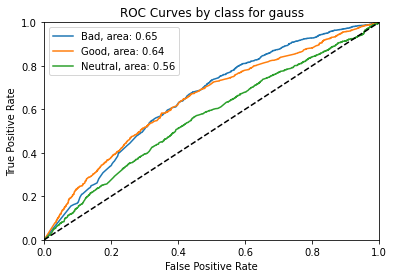

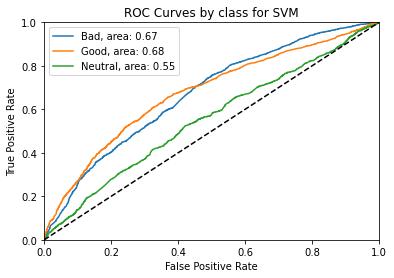

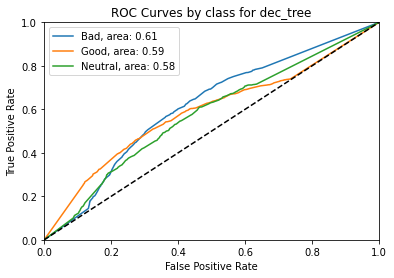

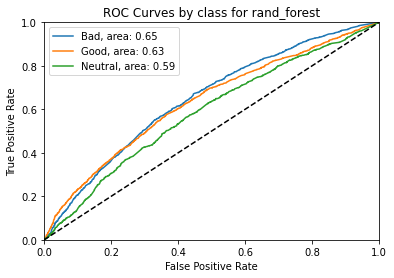

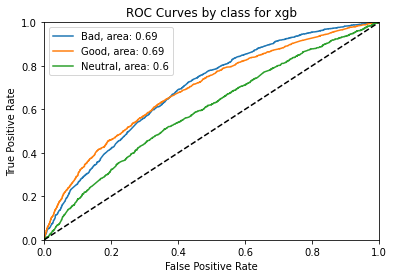

In [5]:
get_ROC_curve(models, model_names, X_train_preprocessed, X_test_preprocessed, y_train_b, y_test_b)

Models poorly predict neutral category. Let's investigate.

# Examining "Neutral" category

* select best model
* gather preprocessed data
* predict for that model on test data (confusion matrix)

Best models: rand forest, **xgb**

Re - splitting data to ensure matching indeces for names.

In [22]:
df = pd.read_pickle('superhero_data_for_model_10-20-20_PICKLE')

In [23]:
features = ['ID', 'EYE', 'HAIR', 'SEX', 'GSM', 'ALIVE', 'APPEARANCES']
target = ['ALIGN']

features_with_name = ['name','ID', 'EYE', 'HAIR', 'SEX', 'GSM', 'ALIVE', 'APPEARANCES']

In [24]:
X = df.loc[:, features_with_name]
y = df.loc[:, target]

In [25]:
# not binarized
X_train_preprocessed, X_test_preprocessed, y_train, y_test, train_names, test_names = data_prep_NOT_binarized_with_names(df, features_with_name, target)

X_train_preprocessed, X_test_preprocessed, y_train, y_test, train_names, test_names variables created


In [26]:
test_names

,name
6241,Cactus (Earth-616)
20713,Mimic (New Earth)
10653,Daglio (Earth-616)
15464,K'rll (Earth-616)
5869,Krystal (Mutant) (Earth-616)
...,...
8064,Martha Gomes (Earth-616)
9014,Shadow Lord (Earth-616)
14286,Kathy Bohusk (Earth-616)
8396,Drayson (Earth-616)


## Fitting model

In [27]:
xgb = XGBClassifier()
xgb_param = xgb.get_xgb_params()
xgb_param['num_class'] = 3
xgb.fit(X_train_preprocessed, y_train)

/Users/noah/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Make predictions

In [28]:
y_pred = pd.DataFrame(xgb.predict(X_test_preprocessed), columns = ['y_pred'], index = X_test_preprocessed.index)

In [29]:
y_test #already has correct index

,ALIGN
6241,Bad Characters
20713,Bad Characters
10653,Bad Characters
15464,Bad Characters
5869,Neutral Characters
...,...
8064,Bad Characters
9014,Good Characters
14286,Good Characters
8396,Neutral Characters


## Make comparison dataframe

In [30]:
X_test_neutral_group_eval = X_test_preprocessed.copy()

In [31]:
X_test_preprocessed.head()

,APPEARANCES,ID_Identity Unknown,ID_Known to Authorities Identity,ID_NA,ID_No Dual Identity,ID_Public Identity,ID_Secret Identity,EYE_Amber Eyes,EYE_Auburn Hair,EYE_Black Eyes,...,SEX_Female Characters,SEX_Male Characters,SEX_NA,GSM_Bisexual Characters,GSM_Homosexual Characters,GSM_Not_minority,GSM_Other,ALIVE_Deceased Characters,ALIVE_Living Characters,ALIVE_NA
6241,-0.152286,-0.02003,-0.023943,1.740961,-0.288836,-0.657852,-0.769469,-0.022714,-0.02003,-0.211156,...,-0.577659,-1.544829,4.779567,-0.036325,-0.071994,0.082502,-0.016928,-0.549946,0.550387,-0.016928
20713,-0.162838,-0.02003,-0.023943,-0.574395,-0.288836,-0.657852,1.299598,-0.022714,-0.02003,-0.211156,...,-0.577659,0.647321,-0.209224,-0.036325,-0.071994,0.082502,-0.016928,-0.549946,0.550387,-0.016928
10653,-0.183943,-0.02003,-0.023943,-0.574395,-0.288836,1.520098,-0.769469,-0.022714,-0.02003,-0.211156,...,-0.577659,0.647321,-0.209224,-0.036325,-0.071994,0.082502,-0.016928,-0.549946,0.550387,-0.016928
15464,-0.183943,-0.02003,-0.023943,-0.574395,-0.288836,-0.657852,1.299598,-0.022714,-0.02003,4.735841,...,-0.577659,0.647321,-0.209224,-0.036325,-0.071994,0.082502,-0.016928,-0.549946,0.550387,-0.016928
5869,-0.141734,-0.02003,-0.023943,-0.574395,3.462168,-0.657852,-0.769469,-0.022714,-0.02003,-0.211156,...,1.731125,-1.544829,-0.209224,-0.036325,-0.071994,0.082502,-0.016928,-0.549946,0.550387,-0.016928


## Add names, predictions and y_test

In [32]:
X_test_neutral_group_eval['name'] = test_names
X_test_neutral_group_eval['y_pred'] = y_pred
X_test_neutral_group_eval['y_actual'] = y_test

In [33]:
X_test_neutral_group_eval

,APPEARANCES,ID_Identity Unknown,ID_Known to Authorities Identity,ID_NA,ID_No Dual Identity,ID_Public Identity,ID_Secret Identity,EYE_Amber Eyes,EYE_Auburn Hair,EYE_Black Eyes,...,GSM_Bisexual Characters,GSM_Homosexual Characters,GSM_Not_minority,GSM_Other,ALIVE_Deceased Characters,ALIVE_Living Characters,ALIVE_NA,name,y_pred,y_actual
6241,-0.152286,-0.02003,-0.023943,1.740961,-0.288836,-0.657852,-0.769469,-0.022714,-0.02003,-0.211156,...,-0.036325,-0.071994,0.082502,-0.016928,-0.549946,0.550387,-0.016928,Cactus (Earth-616),Neutral Characters,Bad Characters
20713,-0.162838,-0.02003,-0.023943,-0.574395,-0.288836,-0.657852,1.299598,-0.022714,-0.02003,-0.211156,...,-0.036325,-0.071994,0.082502,-0.016928,-0.549946,0.550387,-0.016928,Mimic (New Earth),Bad Characters,Bad Characters
10653,-0.183943,-0.02003,-0.023943,-0.574395,-0.288836,1.520098,-0.769469,-0.022714,-0.02003,-0.211156,...,-0.036325,-0.071994,0.082502,-0.016928,-0.549946,0.550387,-0.016928,Daglio (Earth-616),Bad Characters,Bad Characters
15464,-0.183943,-0.02003,-0.023943,-0.574395,-0.288836,-0.657852,1.299598,-0.022714,-0.02003,4.735841,...,-0.036325,-0.071994,0.082502,-0.016928,-0.549946,0.550387,-0.016928,K'rll (Earth-616),Bad Characters,Bad Characters
5869,-0.141734,-0.02003,-0.023943,-0.574395,3.462168,-0.657852,-0.769469,-0.022714,-0.02003,-0.211156,...,-0.036325,-0.071994,0.082502,-0.016928,-0.549946,0.550387,-0.016928,Krystal (Mutant) (Earth-616),Good Characters,Neutral Characters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,-0.162838,-0.02003,-0.023943,-0.574395,-0.288836,-0.657852,1.299598,-0.022714,-0.02003,-0.211156,...,-0.036325,-0.071994,0.082502,-0.016928,-0.549946,0.550387,-0.016928,Martha Gomes (Earth-616),Bad Characters,Bad Characters
9014,-0.173390,-0.02003,-0.023943,-0.574395,-0.288836,-0.657852,1.299598,-0.022714,-0.02003,-0.211156,...,-0.036325,-0.071994,0.082502,-0.016928,-0.549946,0.550387,-0.016928,Shadow Lord (Earth-616),Bad Characters,Good Characters
14286,-0.183943,-0.02003,-0.023943,1.740961,-0.288836,-0.657852,-0.769469,-0.022714,-0.02003,-0.211156,...,-0.036325,-0.071994,0.082502,-0.016928,-0.549946,0.550387,-0.016928,Kathy Bohusk (Earth-616),Neutral Characters,Good Characters
8396,-0.173390,-0.02003,-0.023943,-0.574395,3.462168,-0.657852,-0.769469,-0.022714,-0.02003,-0.211156,...,-0.036325,-0.071994,0.082502,-0.016928,-0.549946,0.550387,-0.016928,Drayson (Earth-616),Neutral Characters,Neutral Characters


## Where do predictions and actuals not match?

In [34]:
mask = X_test_neutral_group_eval['y_pred'] != X_test_neutral_group_eval['y_actual']

dont_match = X_test_neutral_group_eval.loc[mask]

## Who does not match?

In [35]:
dont_match.name

6241                Cactus (Earth-616)
5869      Krystal (Mutant) (Earth-616)
22670               Egeria (New Earth)
2983          Sonya Tolsky (Earth-616)
13501    Circus Pants XVII (Earth-616)
                     ...              
19282        Justin Powell (New Earth)
20864            Carnivora (New Earth)
9014           Shadow Lord (Earth-616)
14286         Kathy Bohusk (Earth-616)
20555         Fidel Castro (New Earth)
Name: name, Length: 2813, dtype: object

## How many are neutral?

In [37]:
dont_match.y_actual.value_counts()

Neutral Characters    1156
Good Characters        969
Bad Characters         688
Name: y_actual, dtype: int64

Clearly neutral characters are the hardest to quantify.

## Let's examine other features that tend to be associated.

## But these are scaled so have to look back at original df to get actual values in columns...

In [38]:
mask2 = df['name'].isin(dont_match['name'])

dont_match_unscaled = df[mask2].sort_values(by = 'APPEARANCES', ascending = False)

## Let's look at variables in the non-matching group.

/Users/noah/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


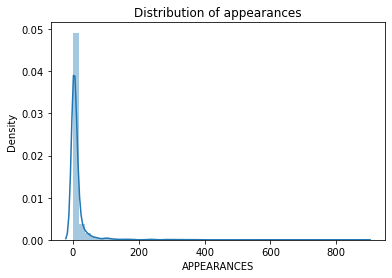

In [39]:
sns.distplot(dont_match_unscaled['APPEARANCES'])
plt.title('Distribution of appearances');

In [40]:
dont_match_unscaled.ID.value_counts()

Secret Identity                  987
Public Identity                  832
NA                               778
No Dual Identity                 214
Known to Authorities Identity      1
Identity Unknown                   1
Name: ID, dtype: int64

In [41]:
dont_match_unscaled.EYE.value_counts()

no color              1582
Blue Eyes              375
Brown Eyes             366
Black Eyes             129
Green Eyes              96
Red Eyes                71
White Eyes              65
Yellow Eyes             46
Grey Eyes               22
Hazel Eyes              13
Photocellular Eyes       7
Purple Eyes              6
Variable Eyes            5
Violet Eyes              5
Gold Eyes                5
Amber Eyes               5
Orange Eyes              4
One Eye                  4
Pink Eyes                3
Yellow Eyeballs          2
Silver Eyes              1
Multiple Eyes            1
Name: EYE, dtype: int64

In [42]:
dont_match_unscaled.GSM.value_counts()

Not_minority             2796
Homosexual Characters      12
Bisexual Characters         5
Name: GSM, dtype: int64

In [43]:
dont_match_unscaled.is_marvel.value_counts()

1    2002
0     811
Name: is_marvel, dtype: int64

Marvel characters have more mismatches.

In [44]:
dont_match_unscaled.SEX.value_counts()

Male Characters       1958
Female Characters      725
NA                     127
Agender Characters       3
Name: SEX, dtype: int64

In [45]:
dont_match_unscaled.ALIVE.value_counts()

Living Characters      2195
Deceased Characters     618
Name: ALIVE, dtype: int64

Mis-predicted characters with > 500 appearances

In [46]:
mask3 = dont_match_unscaled['APPEARANCES'] >500

dont_match_unscaled[mask3]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,is_marvel
35,3765,Emma Frost (Earth-616),\/Emma_Frost_(Earth-616),Public Identity,Neutral Characters,Blue Eyes,Brown Hair,Female Characters,Not_minority,Living Characters,880.0,Jan-80,1980,1
54,32498,Nathan Summers (Earth-616),\/Nathan_Summers_(Earth-616),Public Identity,Neutral Characters,Blue Eyes,White Hair,Male Characters,Not_minority,Living Characters,612.0,Jan-86,1986,1


# Examining feature importance - Logistic Regression

In [83]:
lr.fit(X_train_preprocessed,y_train)

for name, imp in list(zip(X_test_preprocessed.columns, lr.coef_[0])):
    print(name, round(imp,3))

/Users/noah/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


APPEARANCES -0.013
ID_Identity Unknown 0.004
ID_Known to Authorities Identity -0.014
ID_NA 0.003
ID_No Dual Identity -0.01
ID_Public Identity 0.012
ID_Secret Identity -0.009
EYE_Amber Eyes -0.01
EYE_Auburn Hair -0.016
EYE_Black Eyes 0.02
EYE_Blue Eyes 0.001
EYE_Brown Eyes -0.006
EYE_Gold Eyes 0.003
EYE_Green Eyes -0.009
EYE_Grey Eyes -0.018
EYE_Hazel Eyes 0.005
EYE_Multiple Eyes 0.052
EYE_No Eyes 0.064
EYE_One Eye 0.003
EYE_Orange Eyes -0.005
EYE_Photocellular Eyes 0.017
EYE_Pink Eyes 0.002
EYE_Purple Eyes -0.003
EYE_Red Eyes -0.021
EYE_Silver Eyes 0.006
EYE_Variable Eyes 0.027
EYE_Violet Eyes 0.005
EYE_White Eyes 0.018
EYE_Yellow Eyeballs 0.0
EYE_Yellow Eyes -0.004
EYE_no color -0.004
HAIR_Auburn Hair -0.001
HAIR_Bald 0.001
HAIR_Black Hair 0.002
HAIR_Blond Hair -0.016
HAIR_Blue Hair -0.018
HAIR_Brown Hair -0.003
HAIR_Gold Hair 0.013
HAIR_Green Hair 0.009
HAIR_Grey Hair 0.002
HAIR_Light Brown Hair 0.004
HAIR_Magenta Hair -0.007
HAIR_No Hair -0.005
HAIR_Orange Hair 0.01
HAIR_Pink Hair -

In [85]:
features_importance_lr = pd.DataFrame(list(zip(X_test_preprocessed.columns, lr.coef_[0])), columns = ['Feature', 'Importance'])

In [86]:
feat_imp_sorted_lr = features_importance_lr.sort_values(by='Importance', ascending = True)

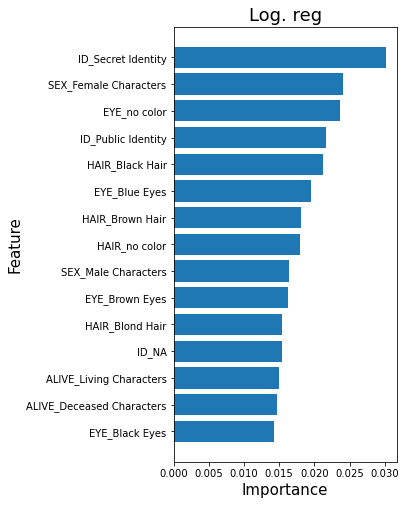

In [90]:
fig, ax = plt.subplots(figsize=(4, 8))
ax.barh(feat_imp_sorted_lr['Feature'][-15:], feat_imp_sorted_lr['Importance'][-15:], label='none')
# ax.set_yticks(np.arange(len(X_train_ohe.columns)))
# ax.set_yticklabels(feat_imp_sorted['Feature'], rotation = 90)
ax.set_xlabel('Importance', size = 15)
ax.set_ylabel('Feature', size = 15)
ax.set_title('Log. reg', size=18);

Sex and identity status appear most important.

# Examining feature importance - XGB

In [47]:
X_test_preprocessed.columns

Index(['APPEARANCES', 'ID_Identity Unknown',
       'ID_Known to Authorities Identity', 'ID_NA', 'ID_No Dual Identity',
       'ID_Public Identity', 'ID_Secret Identity', 'EYE_Amber Eyes',
       'EYE_Auburn Hair', 'EYE_Black Eyes', 'EYE_Blue Eyes', 'EYE_Brown Eyes',
       'EYE_Gold Eyes', 'EYE_Green Eyes', 'EYE_Grey Eyes', 'EYE_Hazel Eyes',
       'EYE_Multiple Eyes', 'EYE_No Eyes', 'EYE_One Eye', 'EYE_Orange Eyes',
       'EYE_Photocellular Eyes', 'EYE_Pink Eyes', 'EYE_Purple Eyes',
       'EYE_Red Eyes', 'EYE_Silver Eyes', 'EYE_Variable Eyes',
       'EYE_Violet Eyes', 'EYE_White Eyes', 'EYE_Yellow Eyeballs',
       'EYE_Yellow Eyes', 'EYE_no color', 'HAIR_Auburn Hair', 'HAIR_Bald',
       'HAIR_Black Hair', 'HAIR_Blond Hair', 'HAIR_Blue Hair',
       'HAIR_Brown Hair', 'HAIR_Gold Hair', 'HAIR_Green Hair',
       'HAIR_Grey Hair', 'HAIR_Light Brown Hair', 'HAIR_Magenta Hair',
       'HAIR_No Hair', 'HAIR_Orange Hair', 'HAIR_Pink Hair',
       'HAIR_Purple Hair', 'HAIR_Red Hair', 'H

In [93]:
xgb.fit(X_train_preprocessed,y_train)

from xgboost import plot_importance
for name, imp in list(zip(X_test_preprocessed.columns, xgb.feature_importances_)):
    print(name, round(imp,3))

/Users/noah/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


APPEARANCES 0.018
ID_Identity Unknown 0.006
ID_Known to Authorities Identity 0.005
ID_NA 0.019
ID_No Dual Identity 0.019
ID_Public Identity 0.015
ID_Secret Identity 0.018
EYE_Amber Eyes 0.007
EYE_Auburn Hair 0.008
EYE_Black Eyes 0.022
EYE_Blue Eyes 0.015
EYE_Brown Eyes 0.023
EYE_Gold Eyes 0.007
EYE_Green Eyes 0.021
EYE_Grey Eyes 0.025
EYE_Hazel Eyes 0.021
EYE_Multiple Eyes 0.016
EYE_No Eyes 0.006
EYE_One Eye 0.008
EYE_Orange Eyes 0.007
EYE_Photocellular Eyes 0.011
EYE_Pink Eyes 0.009
EYE_Purple Eyes 0.015
EYE_Red Eyes 0.023
EYE_Silver Eyes 0.009
EYE_Variable Eyes 0.006
EYE_Violet Eyes 0.01
EYE_White Eyes 0.024
EYE_Yellow Eyeballs 0.005
EYE_Yellow Eyes 0.023
EYE_no color 0.019
HAIR_Auburn Hair 0.017
HAIR_Bald 0.026
HAIR_Black Hair 0.022
HAIR_Blond Hair 0.02
HAIR_Blue Hair 0.024
HAIR_Brown Hair 0.022
HAIR_Gold Hair 0.015
HAIR_Green Hair 0.02
HAIR_Grey Hair 0.015
HAIR_Light Brown Hair 0.001
HAIR_Magenta Hair 0.007
HAIR_No Hair 0.025
HAIR_Orange Hair 0.025
HAIR_Pink Hair 0.018
HAIR_Purple 

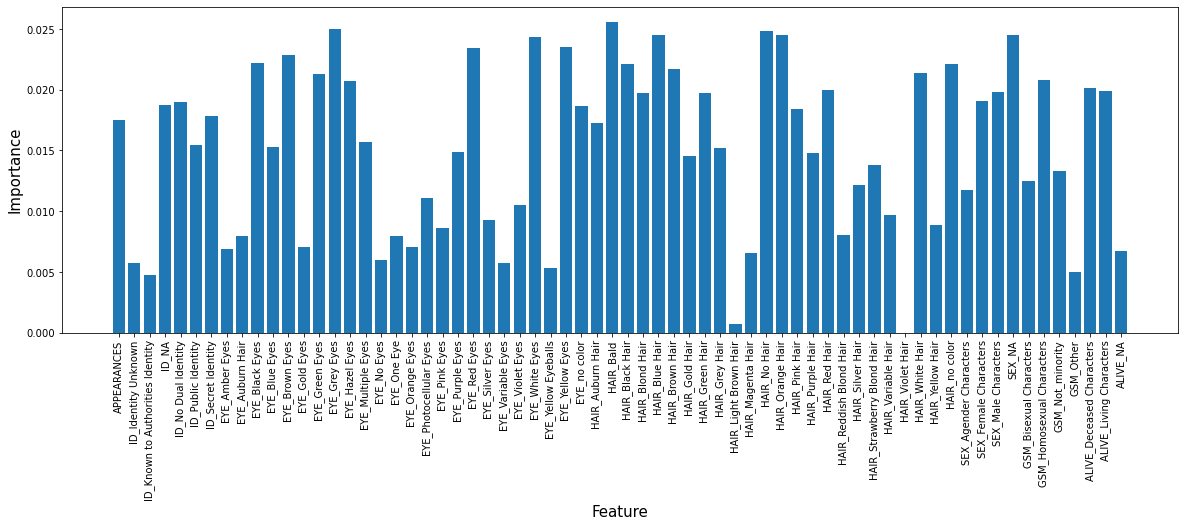

In [94]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_, label='Men')
ax.set_xticks(np.arange(len(X_test_preprocessed.columns)))
ax.set_xticklabels(X_test_preprocessed.columns, rotation = 90)
ax.set_xlabel('Feature', size = 15)
ax.set_ylabel('Importance', size = 15);

## Plot of features in order of importance

In [95]:
features_importance_xgb = pd.DataFrame(list(zip(X_test_preprocessed.columns, xgb.feature_importances_)), columns = ['Feature', 'Importance'])

In [99]:
feat_imp_sorted_xgb = features_importance.sort_values(by='Importance', ascending = False)

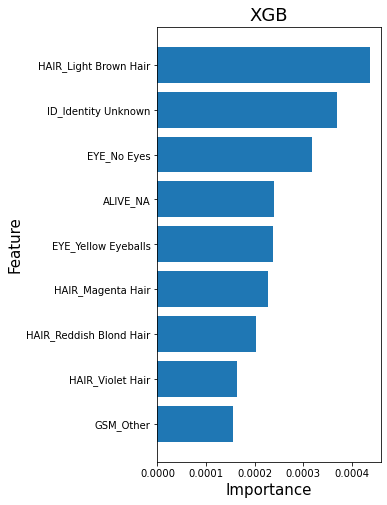

In [107]:
fig, ax = plt.subplots(figsize=(4, 8))
ax.barh(feat_imp_sorted_xgb['Feature'][:-10:-1], feat_imp_sorted_xgb['Importance'][:-10:-1], label='none')
# ax.barh(feat_imp_sorted_xgb['Feature'][:-10:-1], feat_imp_sorted_xgb['Importance'][:-10:-1], label='none')

# ax.set_yticks(np.arange(len(X_train_ohe.columns)))
# ax.set_yticklabels(feat_imp_sorted['Feature'], rotation = 90)
ax.set_xlabel('Importance', size = 15)
ax.set_ylabel('Feature', size = 15)
ax.set_title('XGB', size=18);

## ...and send to tableau

In [69]:
feat_imp_sorted.to_csv(r'feat_imp_XGB.csv')

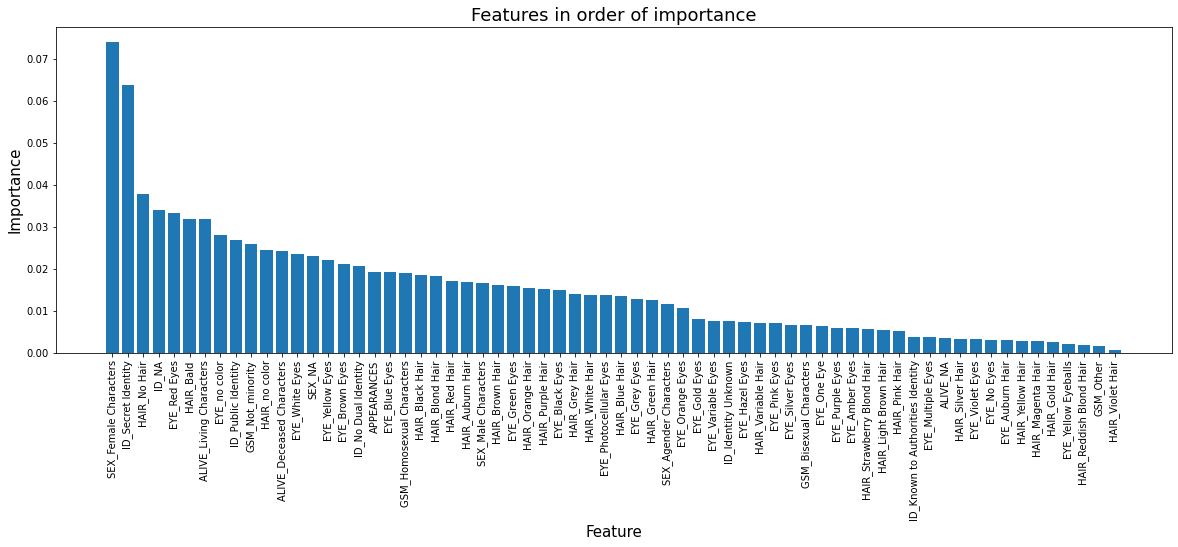

In [52]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(feat_imp_sorted['Feature'], feat_imp_sorted['Importance'], label='none')
ax.set_xticks(np.arange(len(X_test_preprocessed.columns)))
ax.set_xticklabels(feat_imp_sorted['Feature'], rotation = 90)
ax.set_xlabel('Feature', size = 15)
ax.set_ylabel('Importance', size = 15)
ax.set_title('Features in order of importance', size=18);

## Top 10 most important features in order of importance

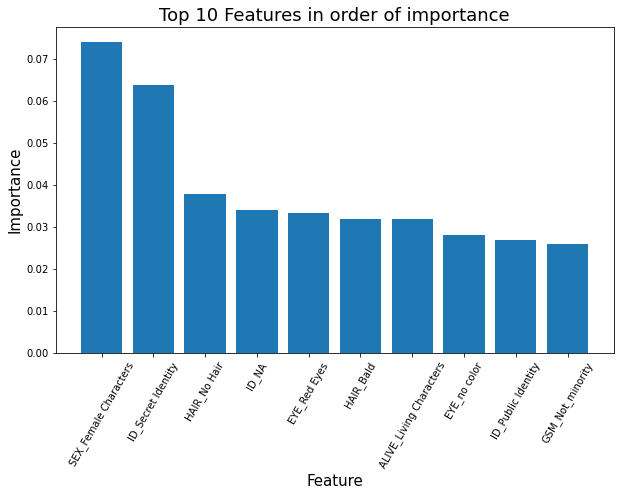

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(feat_imp_sorted['Feature'][:10], feat_imp_sorted['Importance'][:10], label='none')
ax.set_xticks(np.arange(len(X_test_preprocessed.columns))[:10])
ax.set_xticklabels(feat_imp_sorted['Feature'][:10], rotation = 60)
ax.set_xlabel('Feature', size = 15)
ax.set_ylabel('Importance', size = 15)
ax.set_title('Top 10 Features in order of importance', size=18);

## Let's rotate it 90°...

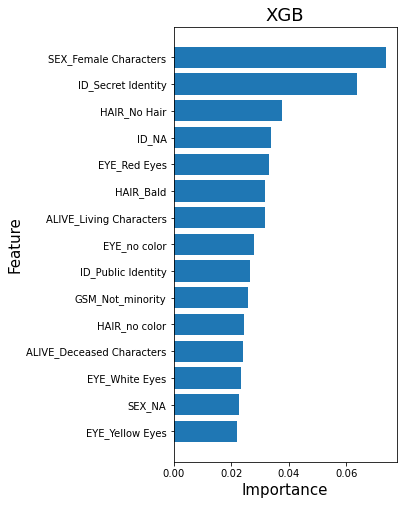

In [55]:
features_importance = pd.DataFrame(list(zip(X_test_preprocessed.columns, xgb.feature_importances_)), columns = ['Feature', 'Importance'])
feat_imp_sorted_asc = features_importance.sort_values(by='Importance', ascending = True)
fig, ax = plt.subplots(figsize=(4, 8))
ax.barh(feat_imp_sorted_asc['Feature'][-15:], feat_imp_sorted_asc['Importance'][-15:], label='none')
# ax.set_yticks(np.arange(len(X_train_ohe.columns)))
# ax.set_yticklabels(feat_imp_sorted['Feature'], rotation = 90)
ax.set_xlabel('Importance', size = 15)
ax.set_ylabel('Feature', size = 15)
ax.set_title('XGB', size=18);

## What is target class distribution of most important features?

In [67]:
males = df.loc[df['SEX'] == 'Male Characters']
females = df.loc[df['SEX'] == 'Female Characters']

In [68]:
blue_bar = [males.loc[males['ALIGN']=='Bad Characters'].count(), males.loc[males['ALIGN']=='Good Characters'].count(), males.loc[males['ALIGN']=='Good Characters'].count()]

orange_bar = [females.loc[females['ALIGN']=='Bad Characters'].count(), females.loc[females['ALIGN']=='Good Characters'].count(), females.loc[females['ALIGN']=='Good Characters'].count()]

In [ ]:
# Numbers of pairs of bars
N = 3

# Data on X-axis

# Specify the values of blue bars (height) ---- this should be male[bad, good, neutral]
blue_bar = [males.loc[males['ALIGN']=='Bad Characters'].count()[0], males.loc[males['ALIGN']=='Good Characters'].count()[0], males.loc[males['ALIGN']=='Good Characters'].count()[0]]
# Specify the values of orange bars (height) ---- this should be female[bad, good, neutral]
orange_bar = [females.loc[females['ALIGN']=='Bad Characters'].count()[0], females.loc[females['ALIGN']=='Good Characters'].count()[0], females.loc[females['ALIGN']=='Good Characters'].count()[0]]
# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting bars
plt.bar(ind, blue_bar , width, label='Male characters')
plt.bar(ind + width, orange_bar, width, label='Female characters')

# Labels
plt.xlabel('Alignment')
plt.ylabel('Count by sex')
# plt.title('plot title')

# Xticks()
plt.xticks(ind + width / 2, ('Bad characters', 'Good characters', 'Neutral characters'))

# Legend
plt.legend(loc='best')
plt.show()

# Examining feature importance - Random Forest

In [56]:
lr = LogisticRegression(penalty='none')
knn = KNeighborsClassifier(n_neighbors=18)
gauss = GaussianNB()
svm = SVC(probability =True)
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()
xgb = XGBClassifier()

In [59]:
rand_forest.fit(X_train_preprocessed, y_train)

for name, imp in list(zip(X_test_preprocessed.columns, rand_forest.feature_importances_)):
    print(name, round(imp,3))

/Users/noah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


APPEARANCES 0.525
ID_Identity Unknown 0.0
ID_Known to Authorities Identity 0.001
ID_NA 0.015
ID_No Dual Identity 0.014
ID_Public Identity 0.022
ID_Secret Identity 0.03
EYE_Amber Eyes 0.001
EYE_Auburn Hair 0.0
EYE_Black Eyes 0.014
EYE_Blue Eyes 0.02
EYE_Brown Eyes 0.016
EYE_Gold Eyes 0.001
EYE_Green Eyes 0.013
EYE_Grey Eyes 0.005
EYE_Hazel Eyes 0.004
EYE_Multiple Eyes 0.001
EYE_No Eyes 0.0
EYE_One Eye 0.001
EYE_Orange Eyes 0.002
EYE_Photocellular Eyes 0.002
EYE_Pink Eyes 0.002
EYE_Purple Eyes 0.002
EYE_Red Eyes 0.013
EYE_Silver Eyes 0.001
EYE_Variable Eyes 0.002
EYE_Violet Eyes 0.001
EYE_White Eyes 0.011
EYE_Yellow Eyeballs 0.0
EYE_Yellow Eyes 0.009
EYE_no color 0.024
HAIR_Auburn Hair 0.003
HAIR_Bald 0.012
HAIR_Black Hair 0.021
HAIR_Blond Hair 0.015
HAIR_Blue Hair 0.004
HAIR_Brown Hair 0.018
HAIR_Gold Hair 0.001
HAIR_Green Hair 0.006
HAIR_Grey Hair 0.011
HAIR_Light Brown Hair 0.0
HAIR_Magenta Hair 0.0
HAIR_No Hair 0.014
HAIR_Orange Hair 0.003
HAIR_Pink Hair 0.002
HAIR_Purple Hair 0.003


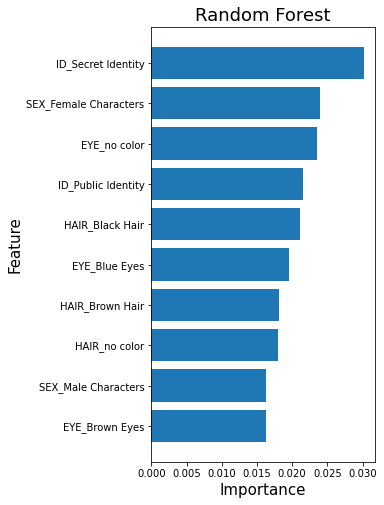

In [66]:
features_importance = pd.DataFrame(list(zip(X_test_preprocessed.iloc[:,1:].columns, rand_forest.feature_importances_[1:])), columns = ['Feature', 'Importance'])
feat_imp_sorted_asc = features_importance.sort_values(by='Importance', ascending = True)
fig, ax = plt.subplots(figsize=(4, 8))
ax.barh(feat_imp_sorted_asc['Feature'][-10:], feat_imp_sorted_asc['Importance'][-10:], label='none')
# ax.set_yticks(np.arange(len(X_train_ohe.columns)))
# ax.set_yticklabels(feat_imp_sorted['Feature'], rotation = 90)
ax.set_xlabel('Importance', size = 15)
ax.set_ylabel('Feature', size = 15)
ax.set_title('Random Forest', size=18);

# Export preprocessed training and testing sets for Tableau

In [175]:
training_set = pd.concat([X_train_preprocessed, y_train], axis=1, sort=False)
testing_set = pd.concat([X_test_preprocessed, y_test], axis=1, sort=False)

In [180]:
training_set = pd.concat([training_set, train_names], axis=1, sort=False)
testing_set = pd.concat([testing_set, test_names], axis=1, sort=False)

In [182]:
training_set.to_csv(r'training_set_10-26-20.csv')
testing_set.to_csv(r'testing_set_10-26-20.csv')

# Some SQL

## 1. Export data to csv for postgres

In [47]:
df_no_spaces.to_csv(r'df_no_.csv', index = False)

## 2. Create empty table in postgres (run this command in postgres in command line)

CREATE TABLE mytable (page_id NUMERIC, name VARCHAR(200), urlslug VARCHAR(200), ID VARCHAR(50), ALIGN VARCHAR(50), EYE VARCHAR(50), HAIR VARCHAR(50), SEX VARCHAR(50), GSM VARCHAR(50), ALIVE VARCHAR(50), APPEARANCES NUMERIC(50), FIRST_APPEARANCE VARCHAR(50), YEAR VARCHAR(50), is_marvel NUMERIC(50));

## 3. Read our CSV into postgres (command line)

COPY mytable FROM '/Users/noah/Github_repos/Project_3/df_no_.csv' DELIMITER ',' CSV HEADER;

## 4. Extract our table back out:

In [49]:
pip install psycopg2

     |████████████████████████████████| 383 kB 1.8 MB/s eta 0:00:01
  Created wheel for psycopg2: filename=psycopg2-2.8.6-cp37-cp37m-macosx_10_9_x86_64.whl size=136244 sha256=99406142ed0b65195e0d6a5d02469045326fc7bed9cc5626ee1e646c3cc11c5e
  Stored in directory: /Users/noah/Library/Caches/pip/wheels/25/78/75/9c0323f7e1fb42143cbd2439302beb7850a1034abb961cb281
Successfully built psycopg2
Note: you may need to restart the kernel to use updated packages.


In [10]:
import psycopg2 as pg

In [14]:
connection_args = {
    'host': 'localhost',  # We are connecting to our _local_ version of psql
    'dbname': 'noah',    # DB that we are connecting to
    'port': 5432          # port we opened on AWS
}

connection = pg.connect(**connection_args)  # What is that "**" there??

In [15]:
query = "SELECT * FROM mytable;"

df_returned = pd.read_sql(query, connection)
df_returned.shape

(23272, 14)

And voila!